# Florencia: Regresion Lineal Multiple

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [114]:
df = pd.read_csv('listings - Florencia_clean.csv')
df.head()

,id,host_id,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,31840,380378,previous scrape,A Residenza Martin Classic room,"Nice, private and quiet double room, classic s...",S/D,Officina 360,2011-02-07,"Florence, Italy",360 Rentals has been offering fully furnished ...,...,5.0,0.0,4.66,4.73,4.87,4.86,4.91,4.91,4.70,0.77
1,32120,99235,city scrape,Welcome at Corte Verde in Florence,Apartment at a 30 minute walk from Ponte Vecch...,S/D,Lucia,2010-03-26,"Florence, Italy",I was born and raised in the beautiful Florenc...,...,1.0,0.0,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.15
2,32180,13925330,city scrape,Charming Gem - Oltrarno City centre,.,S/D,Cesare,2014-04-05,"Florence, Italy",.,...,4.0,0.0,4.74,4.79,4.85,4.79,4.70,4.82,4.85,0.21
3,39115,167739,city scrape,Central Double Shared Bathroom,Double (or Twin) Room Shared Bathroom: comfort...,"San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,8.0,0.0,4.53,4.68,4.60,4.81,4.74,4.90,4.55,0.46
4,39165,167739,previous scrape,Florence Central Double Private Bathroom,"Double room private bathroom: comfortable, lar...","San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,2.0,0.0,4.32,4.21,4.58,4.68,4.63,4.95,4.32,0.13


### Tratamiento de los Datos

In [115]:
# ---------------------------------------------------------------------------------
# 1) Filtrar y transformar la variable "host_acceptance_rate"
#    - Primero eliminamos las filas donde "host_acceptance_rate" sea "S/D"
#    - Después, removemos el carácter "%" y convertimos la columna a tipo float
# ---------------------------------------------------------------------------------
df = df[df['host_acceptance_rate'] != 'S/D']
df['host_acceptance_rate'] = (
    df['host_acceptance_rate']
    .str.replace('%', '')
    .astype(float)
)
# ---------------------------------------------------------------------------------
# 2) Convertir la variable "host_is_superhost" a valores numéricos
#    - Sustituimos la 't' por 1 y la 'f' por 0
#    - Con astype(int), confirmamos el tipo de dato numérico entero
# ---------------------------------------------------------------------------------
df['host_is_superhost'] = (
    df['host_is_superhost']
    .replace({'t': 1, 'f': 0})
    .astype(int)
)
# ---------------------------------------------------------------------------------
# 3) Crear la columna "bathrooms" a partir de "bathrooms_text"
#    - Extraemos únicamente el número que aparece en "bathrooms_text" (puede ser decimal)
#    - Convertimos esos valores a float
#    - Eliminamos las filas que tengan valores nulos en "bathrooms" para evitar problemas
# ---------------------------------------------------------------------------------
df['bathrooms'] = (
    df['bathrooms_text']
    .str.extract(r'(\d+\.?\d*)')
    .astype(float)
)
df = df[df['bathrooms'].notnull()]

# ---------------------------------------------------------------------------------
# 4) Convertir "instant_bookable" a valores numéricos
#    - De la misma forma que con "host_is_superhost": 't' → 1, 'f' → 0
# ---------------------------------------------------------------------------------
df['instant_bookable'] = (
    df['instant_bookable']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita para evitar FutureWarning
)

# ---------------------------------------------------------------------------------
# 5) Convertir "host_identity_verified" a valores numéricos
#    - Misma lógica: 't' → 1, 'f' → 0
# ---------------------------------------------------------------------------------
df['host_identity_verified'] = (
    df['host_identity_verified']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita
)

# ---------------------------------------------------------------------------------
# 6) Convertir la columna "property_type" a valores numéricos
#    - Cada tipo de propiedad se asocia con un código entero según el diccionario "types"
# ---------------------------------------------------------------------------------
types = {
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Private room in bed and breakfast': 4,
    'Entire home': 5,
    'Private room in condo': 6,
    'Entire loft': 7,
    'Room in boutique hotel': 8
}

df['property_type'] = df['property_type'].replace(types)

# Convertimos room_type a numérico
types = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Hotel room': 3,
    'Shared room': 4,
    }
df['room_type'] = df['room_type'].replace(types).astype(int)

# Conservamos los registros donde "property_type" es numérico
df = df[df['property_type'].apply(lambda x: isinstance(x, (int, float)))]

/tmp/ipykernel_1254676/3717803862.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'t': 1, 'f': 0})
/tmp/ipykernel_1254676/3717803862.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'t': 1, 'f': 0})
/tmp/ipykernel_1254676/3717803862.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [116]:
# ---------------------------------------------------------------------------------
# 1) Seleccionar columnas numéricas del DataFrame
#    - Usando select_dtypes para filtrar solo columnas con datos numéricos
#    - Esto incluye tipos int64, float64, etc.
# ---------------------------------------------------------------------------------
dfn = df.select_dtypes(include=[np.number])

# ---------------------------------------------------------------------------------
# 2) Eliminar columnas específicas
#    - Remover 'number_of_reviews_l30d' y 'minimum_nights'
#    - El parámetro axis=1 indica que estamos trabajando con columnas
#    - Las columnas se especifican en una lista para poder eliminar múltiples
# ---------------------------------------------------------------------------------
dfn = dfn.drop(['number_of_reviews_l30d', 'minimum_nights'], axis=1)

# Mostrar los nombres de las columnas resultantes
dfn.columns

Index(['id', 'host_id', 'host_acceptance_rate', 'host_is_superhost',
       'host_identity_verified', 'room_type', 'instant_bookable',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'bathrooms'],
      dtype='object')

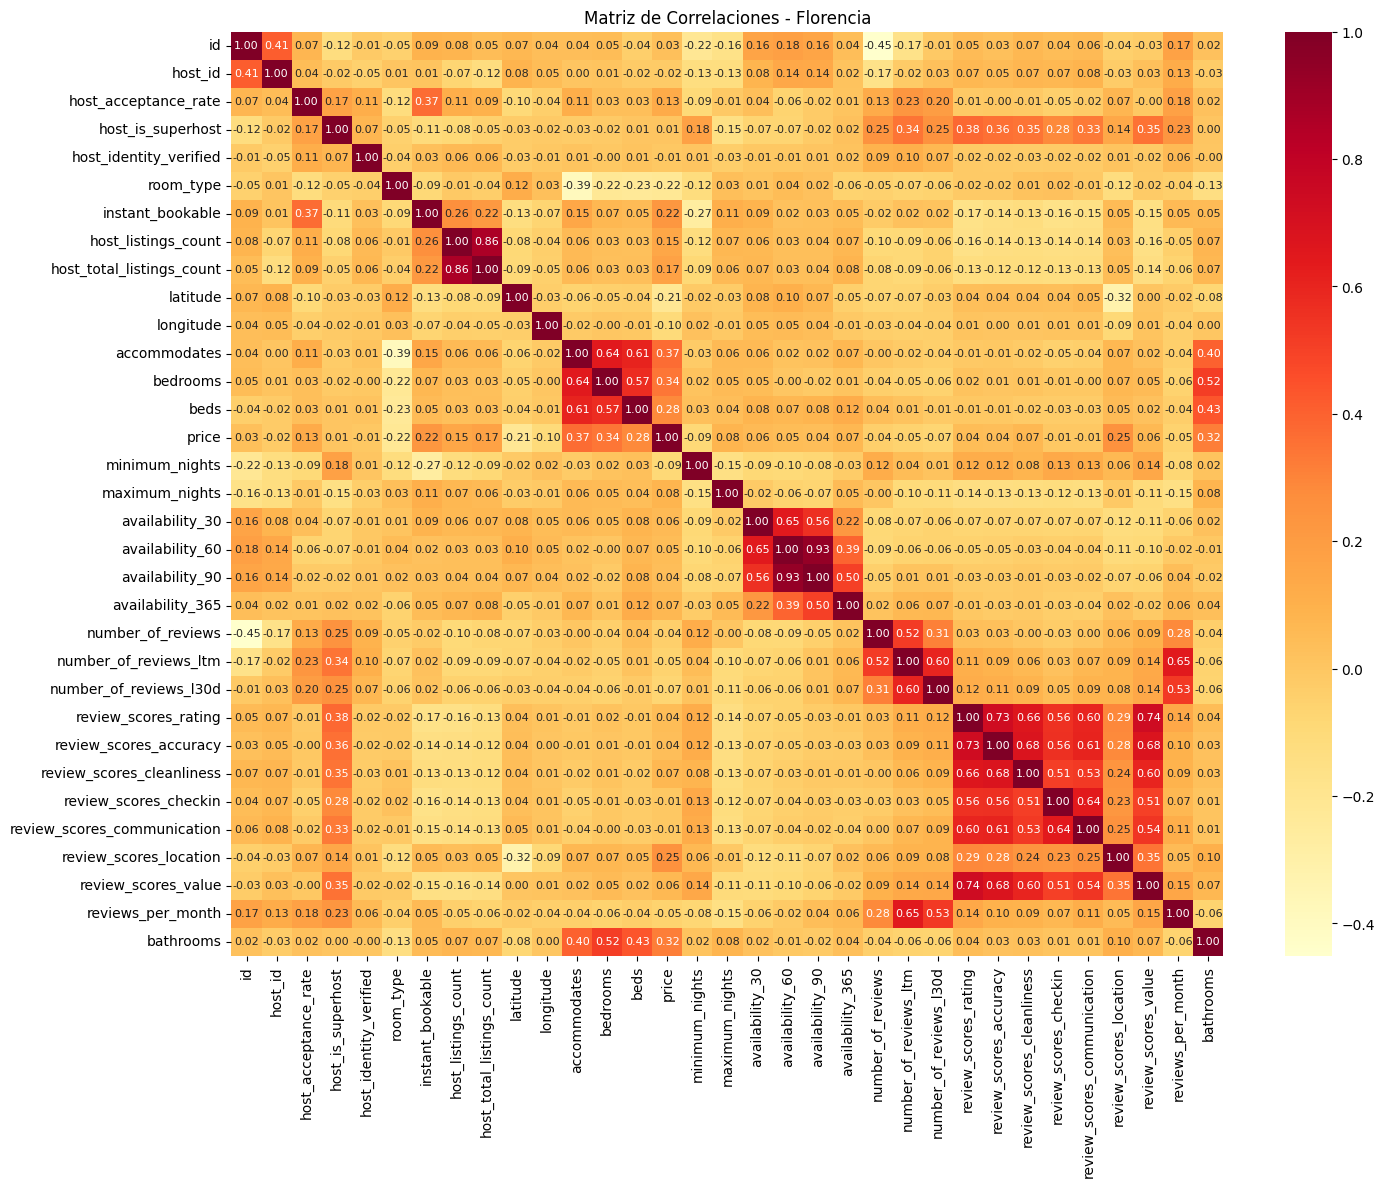

In [117]:
# Obtenemos la matriz de correlaciones
matriz = df.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(16, 12))                           # Configuramos tamaño de figura
sns.heatmap(correlaciones,                             # Creamos heatmap con valores anotados
            annot=True,                                # Muestra valores numéricos
            cmap='YlOrRd',                             # Usa escala de colores amarillo-rojo oscuro
            annot_kws={"size": 8},                     # Define tamaño de fuente para anotaciones
            fmt='.2f')                                 # Formatea números a 2 decimales

plt.title('Matriz de Correlaciones - Florencia')
plt.show()

## host_id

In [118]:
# ---------------------------------------------------------------------------------
# 1) Analizar las correlaciones con la variable host_id
#    - Mostramos las 6 columnas más correlacionadas positivamente
#    - Ordenamos de mayor a menor correlación usando sort_values(ascending=False)
#    - head(6) nos da solo los primeros 6 resultados
#    - Esto nos ayuda a identificar las variables más importantes para el modelo
# ---------------------------------------------------------------------------------
print('------- Correlaciones Positivas -------\n')
print(correlaciones['host_id'].sort_values(ascending=False).head(6))

# ---------------------------------------------------------------------------------
# 2) Analizar las correlaciones negativas con host_id
#    - Mostramos las 3 columnas con mayor correlación negativa
#    - Usamos ascending=True para ordenar de menor a mayor
#    - head(3) selecciona solo las primeras 3 correlaciones negativas
#    - Las correlaciones negativas son igualmente importantes que las positivas
# ---------------------------------------------------------------------------------
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['host_id'].sort_values(ascending=True).head(3))

# ---------------------------------------------------------------------------------
# 3) Preparar datos para el modelo de regresión lineal múltiple
#    - Seleccionamos las variables predictoras X
#    - Incluimos id como identificador único
#    - y es la variable objetivo que queremos predecir
# ---------------------------------------------------------------------------------
X = dfn[['id', 'availability_60', 'availability_90', 'reviews_per_month']]
y = dfn['host_id']

# ---------------------------------------------------------------------------------
# 4) Crear y evaluar el modelo de regresión lineal múltiple
#    - LinearRegression() crea un nuevo modelo vacío
#    - fit(X, y) entrena el modelo con nuestros datos
#    - score(X, y) calcula el coeficiente de determinación R²
#    - La raíz cuadrada de R² nos da la correlación simple
#    - Esto nos permite medir qué tan bien explica nuestro modelo la variabilidad
# ---------------------------------------------------------------------------------
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

host_id                        1.000000
id                             0.414097
availability_60                0.141144
availability_90                0.137326
reviews_per_month              0.127420
review_scores_communication    0.084637
Name: host_id, dtype: float64

------- Correlaciones Negativas -------

number_of_reviews   -0.170500
minimum_nights      -0.129396
maximum_nights      -0.128211
Name: host_id, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.17147655798705352
Correlación: 0.4140972808254765


## host_acceptance_rate

In [119]:
# 1) Analizar las correlaciones con la variable host_id
print('------- Correlaciones Positivas -------\n')
print(correlaciones['host_acceptance_rate'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas con host_id
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['host_acceptance_rate'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['instant_bookable', 'number_of_reviews_ltm', 'reviews_per_month']]
y = dfn['host_acceptance_rate']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

host_acceptance_rate      1.000000
instant_bookable          0.368310
number_of_reviews_ltm     0.231727
number_of_reviews_l30d    0.197886
reviews_per_month         0.178361
host_is_superhost         0.172105
Name: host_acceptance_rate, dtype: float64

------- Correlaciones Negativas -------

room_type        -0.118703
latitude         -0.097475
minimum_nights   -0.093750
Name: host_acceptance_rate, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.18573172356357637
Correlación: 0.43096603527839217


## host_is_superhost

In [138]:
# 1) Analizar las correlaciones con la variable host_id
print('------- Correlaciones Positivas -------\n')
print(correlaciones['host_is_superhost'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas con host_id
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['host_is_superhost'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['review_scores_rating', 'review_scores_accuracy', 'review_scores_value']]
y = dfn['host_is_superhost']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

host_is_superhost            1.000000
review_scores_rating         0.380077
review_scores_accuracy       0.356684
review_scores_value          0.349454
review_scores_cleanliness    0.345774
number_of_reviews_ltm        0.344412
Name: host_is_superhost, dtype: float64

------- Correlaciones Negativas -------

maximum_nights     -0.145307
id                 -0.121961
instant_bookable   -0.105496
Name: host_is_superhost, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.16295839668258805
Correlación: 0.4036810581171577


## host_total_listing_count

In [139]:
# 1) Analizar las correlaciones con la variable
print('------- Correlaciones Positivas -------\n')
print(correlaciones['host_total_listings_count'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['host_total_listings_count'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['host_listings_count', 'instant_bookable', 'price']]
y = dfn['host_total_listings_count']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

host_total_listings_count    1.000000
host_listings_count          0.864131
instant_bookable             0.217399
price                        0.167232
host_acceptance_rate         0.094238
availability_365             0.081396
Name: host_total_listings_count, dtype: float64

------- Correlaciones Negativas -------

review_scores_value     -0.135401
review_scores_rating    -0.132985
review_scores_checkin   -0.131265
Name: host_total_listings_count, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.7483716710990412
Correlación: 0.8650847768277056


## room_type

In [140]:
# 1) Analizar las correlaciones con la variable
print('------- Correlaciones Positivas -------\n')
print(correlaciones['room_type'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['room_type'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['latitude', 'availability_60', 'maximum_nights']]
y = dfn['room_type']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

room_type                1.000000
latitude                 0.121555
availability_60          0.043175
maximum_nights           0.034847
longitude                0.029249
review_scores_checkin    0.022302
Name: room_type, dtype: float64

------- Correlaciones Negativas -------

accommodates   -0.388147
beds           -0.232639
bedrooms       -0.222828
Name: room_type, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.017360860714974224
Correlación: 0.13176061898372451


## accommodates

In [141]:
# 1) Analizar las correlaciones con la variable
print('------- Correlaciones Positivas -------\n')
print(correlaciones['accommodates'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['accommodates'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['bedrooms', 'beds', 'bathrooms']]
y = dfn['accommodates']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

accommodates        1.000000
bedrooms            0.644640
beds                0.608773
bathrooms           0.400192
price               0.369444
instant_bookable    0.149094
Name: accommodates, dtype: float64

------- Correlaciones Negativas -------

room_type               -0.388147
latitude                -0.061169
review_scores_checkin   -0.048378
Name: accommodates, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.5021591370697422
Correlación: 0.7086318769782673


## bedrooms

In [142]:
# 1) Analizar las correlaciones con la variable
print('------- Correlaciones Positivas -------\n')
print(correlaciones['bedrooms'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['bedrooms'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['accommodates', 'beds', 'bathrooms']]
y = dfn['bedrooms']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

bedrooms            1.000000
accommodates        0.644640
beds                0.570329
bathrooms           0.515774
price               0.341511
instant_bookable    0.070036
Name: bedrooms, dtype: float64

------- Correlaciones Negativas -------

room_type                -0.222828
number_of_reviews_l30d   -0.058356
reviews_per_month        -0.057519
Name: bedrooms, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.5189619108792658
Correlación: 0.7203901102036769


## price

In [144]:
# 1) Analizar las correlaciones con la variable
print('------- Correlaciones Positivas -------\n')
print(correlaciones['price'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['price'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['accommodates', 'bedrooms', 'bathrooms']]
y = dfn['price']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

price                     1.000000
accommodates              0.369444
bedrooms                  0.341511
bathrooms                 0.316403
beds                      0.282613
review_scores_location    0.249716
Name: price, dtype: float64

------- Correlaciones Negativas -------

room_type   -0.222346
latitude    -0.214831
longitude   -0.104547
Name: price, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.1755892992764333
Correlación: 0.4190337686588437


## review_scores_value

In [145]:
# 1) Analizar las correlaciones con la variable host_id
print('------- Correlaciones Positivas -------\n')
print(correlaciones['review_scores_value'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas con host_id
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['review_scores_value'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication']]
y = dfn['review_scores_value']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

review_scores_value            1.000000
review_scores_rating           0.737794
review_scores_accuracy         0.677818
review_scores_cleanliness      0.599812
review_scores_communication    0.544951
review_scores_checkin          0.505826
Name: review_scores_value, dtype: float64

------- Correlaciones Negativas -------

host_listings_count         -0.155835
instant_bookable            -0.148150
host_total_listings_count   -0.135401
Name: review_scores_value, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.5953601400182527
Correlación: 0.7715958398139875


## reviews_per_month

In [146]:
# 1) Analizar las correlaciones con la variable host_id
print('------- Correlaciones Positivas -------\n')
print(correlaciones['reviews_per_month'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas con host_id
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['reviews_per_month'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication']]
y = dfn['reviews_per_month']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

reviews_per_month         1.000000
number_of_reviews_ltm     0.646707
number_of_reviews_l30d    0.528428
number_of_reviews         0.282144
host_is_superhost         0.234742
host_acceptance_rate      0.178361
Name: reviews_per_month, dtype: float64

------- Correlaciones Negativas -------

maximum_nights              -0.148466
minimum_nights              -0.078254
host_total_listings_count   -0.064483
Name: reviews_per_month, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.021250187500463258
Correlación: 0.1457744404909971
